<a href="https://colab.research.google.com/github/runminghuang/Transfer_Learning_for_Stock_Prediction/blob/data-processing/Data_processing_signature_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import esig
import iisignature
import pandas as pd
import itertools
from sklearn.decomposition import PCA

## Data Import

In [34]:
x_train = pd.read_csv("/Users/runminghuang/Desktop/capstone/Data/x_train.csv")
y_train = pd.read_csv("/Users/runminghuang/Desktop/capstone/Data/y_train.csv")
x_test = pd.read_csv("/Users/runminghuang/Desktop/capstone/Data/x_test.csv")
y_test = pd.read_csv("/Users/runminghuang/Desktop/capstone/Data/test_rand.csv")

In [35]:
x_train

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,1,0,3,43,15,6,104,0.003984,NaN,-0.090580,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,418590,223,5703,32,10,4,77,0.021843,-0.217823,-0.021703,...,0.003160,-0.161543,0.007785,-0.141487,0.008205,-0.268215,-0.058448,0.057577,0.031174,-0.163350
418591,418591,223,5705,35,12,5,91,-0.006920,-0.375251,0.000000,...,0.007169,-0.955492,-0.016221,-0.171172,0.007819,1.540184,-0.015396,-0.502337,-0.011073,0.632885
418592,418592,223,5709,2,1,1,5,0.021869,-0.978856,-0.005929,...,0.001110,-0.476550,0.029714,-0.385972,-0.069148,1.780169,-0.082927,1.581453,0.098607,6.956960
418593,418593,223,5710,33,10,4,83,0.012248,-0.627169,0.010925,...,0.007450,-0.210079,0.023729,0.813948,0.026087,-0.868576,-0.051155,0.371052,0.041238,0.045695


In [36]:
# Load stock data
df = x_train.sort_values(by=['STOCK', 'DATE']).reset_index(drop=True)
df

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,2377,1,0,37,12,5,94,-0.005967,0.136699,0.009031,...,-0.009219,-0.493354,-0.007660,-0.585497,-0.001063,-0.351363,0.005127,-0.324675,-0.019275,-0.291751
1,5198,4,0,37,12,5,94,0.001348,-0.269520,0.011100,...,-0.000762,-0.313575,0.007867,0.071338,0.007733,-0.405243,-0.003276,-0.424336,-0.010489,-0.050591
2,8017,5,0,37,12,5,94,-0.014405,0.192655,0.003614,...,0.002742,-0.367499,-0.005843,-0.405562,0.002930,-0.315935,0.010462,-0.474957,-0.003541,-0.260130
3,20826,11,0,37,12,5,94,0.008938,0.430916,0.002662,...,0.009097,0.023598,0.011266,0.079711,0.019038,-0.230167,-0.000287,-0.312123,0.008682,-0.226628
4,33843,21,0,37,12,5,94,-0.006523,-0.060371,-0.007632,...,-0.014461,-0.337686,-0.007224,-0.161117,-0.001461,-0.095494,0.012667,0.471895,-0.038752,1.532045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,391556,206,5716,50,17,7,114,0.029552,-0.075091,-0.001428,...,0.024553,0.076480,0.017026,0.170516,0.002276,-0.106224,-0.034597,0.123750,-0.015676,-0.228186
418591,394490,208,5716,50,17,7,114,0.008316,0.028099,-0.006688,...,0.020970,0.090287,0.002887,-0.050408,0.008736,-0.159294,0.027350,-0.022922,0.008186,-0.080569
418592,400150,210,5716,50,17,7,114,-0.004633,-0.173518,0.001687,...,-0.024517,0.695373,-0.015320,-0.149467,-0.035810,-0.262389,0.000896,-0.172450,0.008586,-0.482171
418593,403129,211,5716,50,17,7,114,0.010883,0.172313,0.008844,...,0.005832,-0.045512,-0.008823,-0.026153,-0.011428,-0.142636,0.011253,-0.224195,0.000609,-0.341878


plan：
1. NaN -> 0 or Mean of column of the stock
2. Feature Engineering: 40 rtn and vol dimension -> 10 rtn and vol dim (PCA or other means)  Or, use 1day 5day 20day rtn and vol
3. For each row, calculate the sig (dim=11, order 3)
4. Feature Engineering on the Sig outcome: 1464 dim -> 15 dim (Ridge regression/ Lasso)

## Data Preprocess

In [38]:
# Fill NaN with 0
df = df.fillna(0)
# Keep only the selected columns
# selected_columns = ['ID', 'DATE', 'STOCK'] + [col for col in df.columns if col.startswith(('RET_', 'VOLUME_'))]
# df = df[selected_columns]
df

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,2377,1,0,37,12,5,94,-0.005967,0.136699,0.009031,...,-0.009219,-0.493354,-0.007660,-0.585497,-0.001063,-0.351363,0.005127,-0.324675,-0.019275,-0.291751
1,5198,4,0,37,12,5,94,0.001348,-0.269520,0.011100,...,-0.000762,-0.313575,0.007867,0.071338,0.007733,-0.405243,-0.003276,-0.424336,-0.010489,-0.050591
2,8017,5,0,37,12,5,94,-0.014405,0.192655,0.003614,...,0.002742,-0.367499,-0.005843,-0.405562,0.002930,-0.315935,0.010462,-0.474957,-0.003541,-0.260130
3,20826,11,0,37,12,5,94,0.008938,0.430916,0.002662,...,0.009097,0.023598,0.011266,0.079711,0.019038,-0.230167,-0.000287,-0.312123,0.008682,-0.226628
4,33843,21,0,37,12,5,94,-0.006523,-0.060371,-0.007632,...,-0.014461,-0.337686,-0.007224,-0.161117,-0.001461,-0.095494,0.012667,0.471895,-0.038752,1.532045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,391556,206,5716,50,17,7,114,0.029552,-0.075091,-0.001428,...,0.024553,0.076480,0.017026,0.170516,0.002276,-0.106224,-0.034597,0.123750,-0.015676,-0.228186
418591,394490,208,5716,50,17,7,114,0.008316,0.028099,-0.006688,...,0.020970,0.090287,0.002887,-0.050408,0.008736,-0.159294,0.027350,-0.022922,0.008186,-0.080569
418592,400150,210,5716,50,17,7,114,-0.004633,-0.173518,0.001687,...,-0.024517,0.695373,-0.015320,-0.149467,-0.035810,-0.262389,0.000896,-0.172450,0.008586,-0.482171
418593,403129,211,5716,50,17,7,114,0.010883,0.172313,0.008844,...,0.005832,-0.045512,-0.008823,-0.026153,-0.011428,-0.142636,0.011253,-0.224195,0.000609,-0.341878


## Feature Engineering Methods

### VIF (variance_inflation_factor)
VIF > 10：strong colinearity, considering remove this feature

VIF > 5：mild colinearity, need further research

VIF ≈ 1：feature independence is good

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ret_cols = [col for col in df.columns if col.startswith('RET_')]
vol_cols = [col for col in df.columns if col.startswith('VOLUME_')]

features_for_vif = df[ret_cols + vol_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]
vif_data


,feature,VIF
0,RET_1,1.017835
1,RET_2,1.060485
2,RET_3,1.102149
3,RET_4,1.031332
4,RET_5,1.054145
5,RET_6,1.036464
6,RET_7,1.044032
7,RET_8,1.032669
8,RET_9,1.040597
9,RET_10,1.031541


## Pearson Correlation Matrix

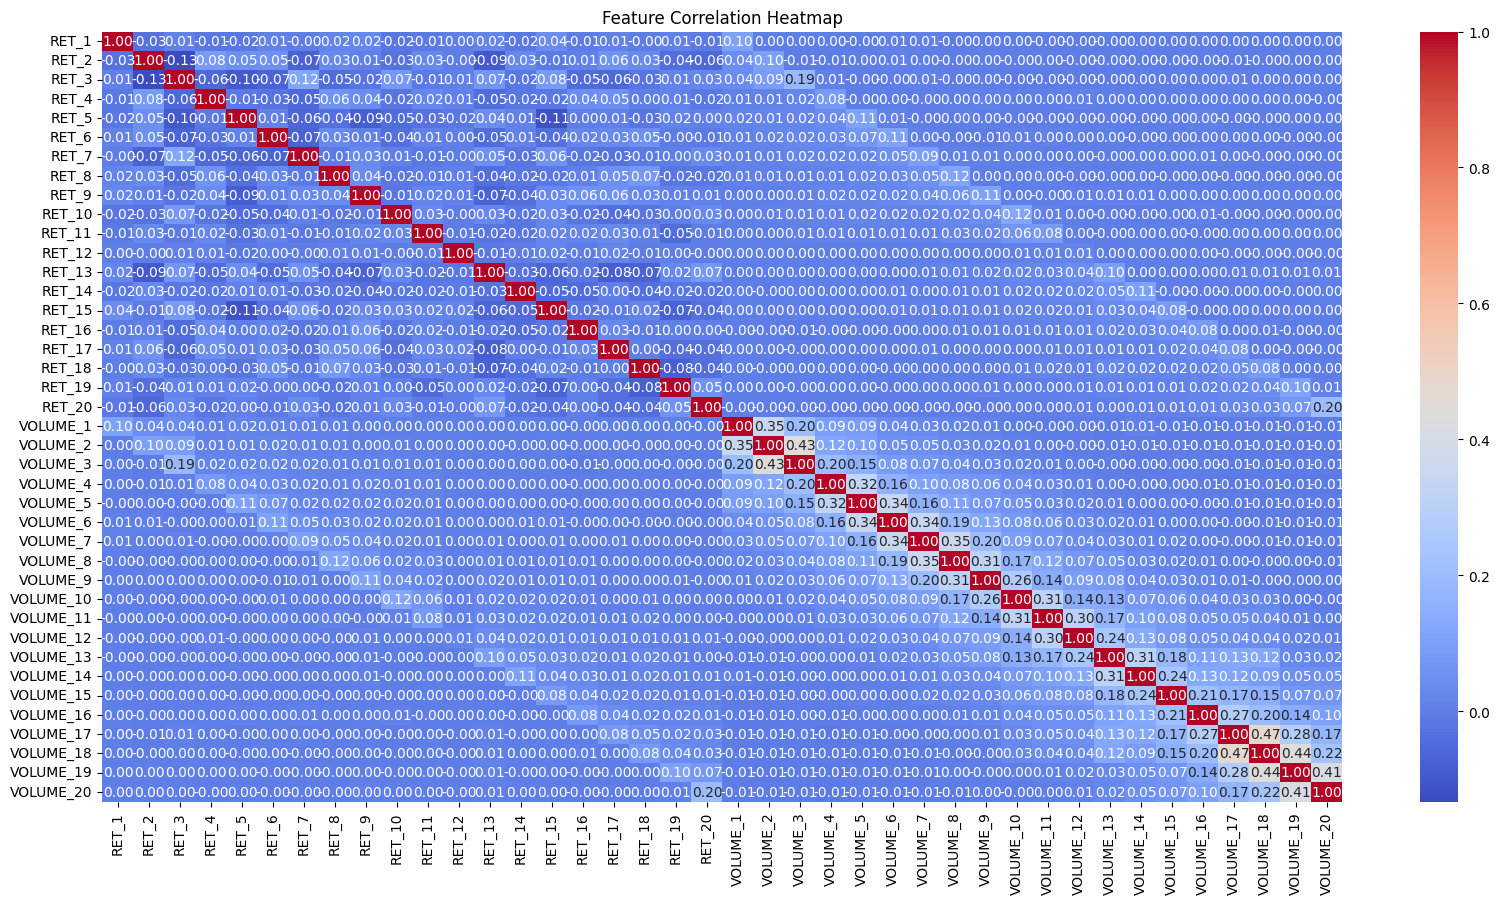

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[ret_cols + vol_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Based on the VIF and Correlation matrix, we have several findings:

    1. VIF of VOLUME and RET data are close to 1, which means that COL_i (VOLUME_i) and COL_j(VOLUME_j) using VIF to explain the correlation correlation generally pass the test, basically will not reduce the independence and marginal contribution to the further model.
    1. RET data has less colinearity issue compared with VOLUME data
    2. The closer j to i, the higher correlation between VOLUME_i and VOLUME_j
    3. Normally, when |j-i| <= 5, the colinearity and correlation problem arise.

Therefore, we choose to use [RET_1, RET_5, RET_10, RET_15, RET_20], [VOLUME_1, VOLUME_5, VOLUME_10, VOLUME_15, VOLUME_20] as our simplified data.

## Feature Engineering Using PCA

In [5]:
ret_cols = [col for col in df.columns if col.startswith('RET_')]
vol_cols = [col for col in df.columns if col.startswith('VOLUME_')]

# Apply PCA to returns
pca_ret = PCA(n_components=5)
ret_pca = pca_ret.fit_transform(df[ret_cols])
ret_pca_df = pd.DataFrame(data=ret_pca, columns=[f'PCA_RET_{i+1}' for i in range(5)], index=df.index)

# Apply PCA to volume
pca_vol = PCA(n_components=5)
vol_pca = pca_vol.fit_transform(df[vol_cols])
vol_pca_df = pd.DataFrame(data=vol_pca, columns=[f'PCA_VOL_{i+1}' for i in range(5)], index=df.index)

# Concatenate PCA results
df_pca = pd.concat([df[['ID', 'DATE', 'STOCK', 'INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'SUB_INDUSTRY']], ret_pca_df, vol_pca_df], axis=1)
df_pca

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,PCA_RET_1,PCA_RET_2,PCA_RET_3,PCA_RET_4,PCA_RET_5,PCA_VOL_1,PCA_VOL_2,PCA_VOL_3,PCA_VOL_4,PCA_VOL_5
0,2377,1,0,37,12,5,94,-0.014258,-0.007401,-0.027476,-0.005828,0.032285,0.837817,-0.337683,0.120331,-0.575671,0.416214
1,5198,4,0,37,12,5,94,-0.004725,-0.001725,-0.001142,-0.006747,0.001001,0.058194,-0.650075,-0.514919,0.137769,-0.240635
2,8017,5,0,37,12,5,94,0.000779,-0.003866,-0.008795,0.000896,-0.005832,0.746969,-0.386991,-0.192132,0.040193,-0.018479
3,20826,11,0,37,12,5,94,0.002867,-0.008982,0.006198,0.004372,0.002254,0.493443,0.008240,-0.138977,0.364540,-0.101550
4,33843,21,0,37,12,5,94,-0.001385,-0.003776,0.008496,-0.019039,0.002123,-0.508459,0.382084,-1.437075,0.041788,0.519180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,391556,206,5716,50,17,7,114,0.013769,-0.014427,0.005998,0.012424,0.025532,-0.225391,0.342625,0.522349,0.218715,-0.282242
418591,394490,208,5716,50,17,7,114,0.009162,0.012654,-0.002195,0.015500,0.008786,-0.040578,0.149366,0.100504,0.203370,-0.283302
418592,400150,210,5716,50,17,7,114,0.005764,0.017102,-0.034786,0.012512,0.013068,-0.309019,0.218427,1.224077,0.566293,-0.577684
418593,403129,211,5716,50,17,7,114,0.009472,-0.004098,-0.023655,0.006036,0.005969,0.044986,-0.198227,0.053178,0.647204,-0.274329


## Signature Computing

In [6]:
# Define signature computation parameters
n = 3  # Signature order
features = ['DATE',
            'PCA_RET_1', 'PCA_RET_2', 'PCA_RET_3', 'PCA_RET_4', 'PCA_RET_5',
            'PCA_VOL_1', 'PCA_VOL_2', 'PCA_VOL_3', 'PCA_VOL_4', 'PCA_VOL_5']
d = len(features)
signature_data = []

#### Test: Only select the first stock

In [10]:
first_stock_name = df_pca['STOCK'].unique()[92]
first_stock_df = df_pca[df_pca['STOCK'] == first_stock_name].sort_values(by="DATE")  # Ensure chronological order

# Extract relevant columns as time-series path
path = first_stock_df[features].values

# Compute the signature for this stock's path
# print(path.shape, n)
# signature = esig.stream2sig(path, n)
signature = iisignature.sig(path, n)
signature_list = list(signature)

# Generate feature interaction labels
multi_index_labels = ["Zeroth Level"]
level_counts = [0]
for level in range(1, n+1):
    indices = list(itertools.product(range(d), repeat=level))  # Generate index sequences
    for idx in indices:
        term_label = '-'.join([features[i] for i in idx])  # Convert index to feature names
        multi_index_labels.append(term_label)
        level_counts.append(level)

# Ensure array sizes match
min_length = min(len(signature_list), len(multi_index_labels), len(level_counts))
signature_list = signature_list[:min_length]
multi_index_labels = multi_index_labels[:min_length]
level_counts = level_counts[:min_length]

# Store results with stock metadata
signature_data = []
for i in range(min_length):
    signature_data.append({
        'Stock': first_stock_name,
        'Signature Term': signature_list[i],
        'Order Level': level_counts[i],
        'Feature Interaction': multi_index_labels[i]
    })

# Convert to DataFrame and display
signature_df = pd.DataFrame(signature_data)
signature_df

(50, 11) 3


,Stock,Signature Term,Order Level,Feature Interaction
0,94,217.000000,0,Zeroth Level
1,94,-0.032884,1,DATE
2,94,0.030539,1,PCA_RET_1
3,94,0.070289,1,PCA_RET_2
4,94,-0.010076,1,PCA_RET_3
...,...,...,...,...
1458,94,51.265253,3,PCA_VOL_5-PCA_VOL_5-PCA_RET_5
1459,94,14.832835,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_1
1460,94,-2.013299,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_2
1461,94,-45.580657,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_3


In [24]:
df_pca

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,PCA_RET_1,PCA_RET_2,PCA_RET_3,PCA_RET_4,PCA_RET_5,PCA_VOL_1,PCA_VOL_2,PCA_VOL_3,PCA_VOL_4,PCA_VOL_5
0,2377,1,0,37,12,5,94,-0.014258,-0.007401,-0.027476,-0.005828,0.032285,0.837817,-0.337683,0.120331,-0.575671,0.416214
1,5198,4,0,37,12,5,94,-0.004725,-0.001725,-0.001142,-0.006747,0.001001,0.058194,-0.650075,-0.514919,0.137769,-0.240635
2,8017,5,0,37,12,5,94,0.000779,-0.003866,-0.008795,0.000896,-0.005832,0.746969,-0.386991,-0.192132,0.040193,-0.018479
3,20826,11,0,37,12,5,94,0.002867,-0.008982,0.006198,0.004372,0.002254,0.493443,0.008240,-0.138977,0.364540,-0.101550
4,33843,21,0,37,12,5,94,-0.001385,-0.003776,0.008496,-0.019039,0.002123,-0.508459,0.382084,-1.437075,0.041788,0.519180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418590,391556,206,5716,50,17,7,114,0.013769,-0.014427,0.005998,0.012424,0.025532,-0.225391,0.342625,0.522349,0.218715,-0.282242
418591,394490,208,5716,50,17,7,114,0.009162,0.012654,-0.002195,0.015500,0.008786,-0.040578,0.149366,0.100504,0.203370,-0.283302
418592,400150,210,5716,50,17,7,114,0.005764,0.017102,-0.034786,0.012512,0.013068,-0.309019,0.218427,1.224077,0.566293,-0.577684
418593,403129,211,5716,50,17,7,114,0.009472,-0.004098,-0.023655,0.006036,0.005969,0.044986,-0.198227,0.053178,0.647204,-0.274329


#### Compute signatures for all stocks

In [11]:
# Process each stock separately
for stock_id, stock_df in df_pca.groupby("STOCK"):
    # print(stock_id, stock_df)
    stock_df = stock_df.sort_values(by="DATE")  # Ensure chronological order

    # Extract relevant columns as time-series path
    path = stock_df[features].values  # Shape (time_steps, 11)

    # Compute the signature for this stock's path
    try:
        # print(stock_id, path.shape, n)
        # signature = esig.stream2sig(path, n)
        signature = iisignature.sig(path, n)
        signature_list = list(signature)
        
    except ValueError as e:
        print(f"Skipping stock {stock_id} due to signature computation error: {e}")
        continue

    # Generate feature interaction labels
    multi_index_labels = ["Zeroth Level"]
    level_counts = [0]
    for level in range(1, n + 1):
        indices = list(itertools.product(range(d), repeat=level))  # Generate index sequences
        for idx in indices:
            term_label = '-'.join([features[i] for i in idx])  # Convert index to feature names
            multi_index_labels.append(term_label)
            level_counts.append(level)

    # Ensure array sizes match
    min_length = min(len(signature_list), len(multi_index_labels), len(level_counts))
    signature_list = signature_list[:min_length]
    multi_index_labels = multi_index_labels[:min_length]
    level_counts = level_counts[:min_length]

    # Store results with stock metadata
    for i in range(min_length):
        signature_data.append({
            'Stock': stock_id,
            'Signature Term': signature_list[i],
            'Order Level': level_counts[i],
            'Feature Interaction': multi_index_labels[i]
        })

# Convert to DataFrame and display
signature_df = pd.DataFrame(signature_data)
signature_df

,Stock,Signature Term,Order Level,Feature Interaction
0,94,217.000000,0,Zeroth Level
1,94,-0.032884,1,DATE
2,94,0.030539,1,PCA_RET_1
3,94,0.070289,1,PCA_RET_2
4,94,-0.010076,1,PCA_RET_3
...,...,...,...,...
7828508,5716,0.346560,3,PCA_VOL_5-PCA_VOL_5-PCA_RET_5
7828509,5716,0.625354,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_1
7828510,5716,0.234473,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_2
7828511,5716,-1.212235,3,PCA_VOL_5-PCA_VOL_5-PCA_VOL_3


In [ ]:
signature_df

""
